In [1]:
import irdatacleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from irdatacleaning import StringToDateTime
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import datetime
import os
from pathlib import Path
from sklearn.linear_model import LinearRegression
# Initialize MinMaxScaler
scaler = MinMaxScaler()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [2]:
data1 = pd.read_csv("delays.csv")

In [3]:
column_names = data1.columns.tolist()
column_names

['datetime', 'id', 'carrier', 'date', 'connection', 'arrival', 'delay', 'name']

In [4]:
data1

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29,0 min,Warszawa Zachodnia
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34,0 min,Warszawa Zachodnia
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55,0 min,Warszawa Zachodnia
...,...,...,...,...,...,...,...,...
3718165,2022-05-29 23:55:00,53172/3 ROZEWIE,PKP Intercity,2022-05-30,Gdynia Główna - Kraków Główny,07:25,4 min,Mysłowice
3718166,2022-05-29 23:55:00,15417,Koleje Mazowieckie,2022-05-30,Warszawa Zachodnia peron 9 - Mława,00:23,0 min,Nowy Dwór Mazowiecki
3718167,2022-05-29 23:55:00,38170/1 USTRONIE,PKP Intercity,2022-05-30,Kraków Główny - Kołobrzeg,02:16,0 min,Nowy Dwór Mazowiecki
3718168,2022-05-29 23:55:00,83170/1 USTRONIE,PKP Intercity,2022-05-30,Kołobrzeg - Kraków Główny,03:17,6 min,Nowy Dwór Mazowiecki


In [5]:
print(data1["name"].unique())

['Warszawa Zachodnia' 'Katowice' 'Gdynia Główna' 'Sopot' 'Gdańsk Główny'
 'Gdańsk Wrzeszcz' 'Warszawa Wschodnia' 'Warszawa Ochota'
 'Warszawa Powiśle' 'Poznań Główny' 'Warszawa Stadion'
 'Warszawa Centralna' 'Kraków Główny' 'Wrocław Główny' 'Rumia'
 'Gdańsk Politechnika' 'Gdynia Chylonia' 'Gdańsk Stocznia' 'Gdańsk Zaspa'
 'Warszawa Włochy' 'Gdańsk Przymorze-Uniwersytet' 'Sopot Wyścigi'
 'Gdańsk Żabianka-AWFiS' 'Sopot Kamienny Potok' 'Gdynia Redłowo'
 'Gdynia Wzgórze Św.Maksymiliana' 'Wejherowo' 'Skierniewice'
 'Katowice Piotrowice' 'Reda' 'Łowicz Główny' 'Żyrardów'
 'Gdynia Leszczynki' 'Gdynia Stocznia-Uniwersytet Morski' 'Legionowo'
 'Katowice Ligota' 'Gdynia Cisowa' 'Łódź Widzew' 'Tychy'
 'Wejherowo-Nanice' 'Rumia Janowo' 'Wejherowo Śmiechowo' 'Gdańsk Oliwa'
 'Warszawa Śródmieście' 'Reda Pieleszewo' 'Bydgoszcz Główna' 'Kutno'
 'Piastów' 'Warszawa Ursus Niedźwiadek' 'Warszawa Ursus' 'Tczew'
 'Warszawa Służewiec' 'Szczecin Główny' 'Świder' 'Józefów' 'Michalin'
 'Pruszków' 'Otwock' 'War

In [6]:
print(data1['arrival'])

0          21:31
1          00:15
2          00:29
3          00:34
4          00:55
           ...  
3718165    07:25
3718166    00:23
3718167    02:16
3718168    03:17
3718169    05:16
Name: arrival, Length: 3718170, dtype: object


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718170 entries, 0 to 3718169
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   datetime    object
 1   id          object
 2   carrier     object
 3   date        object
 4   connection  object
 5   arrival     object
 6   delay       object
 7   name        object
dtypes: object(8)
memory usage: 226.9+ MB


In [8]:
print(data1['arrival'].iloc[37])

Nie dotyczy


In [9]:

# Filtern der Zeilen, die "Nie dotyczy" enthalten
data1 = data1[data1['arrival'] != 'Nie dotyczy']

# Konvertierung der 'arrival'-Spalte in datetime mit .loc, um SettingWithCopyWarning zu vermeiden
data1.loc[:, 'arrival'] = pd.to_datetime(data1['arrival'], format='%H:%M').dt.time

# Konvertierung der 'date'-Spalte in datetime
data1['date'] = pd.to_datetime(data1['date']).dt.date

# Kombinieren von Datum und Uhrzeit
data1['arrival_datetime'] = data1.apply(lambda row: datetime.combine(row['date'], row['arrival']), axis=1)

print(data1['arrival_datetime'])



C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\283329509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.loc[:, 'arrival'] = pd.to_datetime(data1['arrival'], format='%H:%M').dt.time
C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\283329509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date'] = pd.to_datetime(data1['date']).dt.date


0         2022-05-15 21:31:00
1         2022-05-16 00:15:00
2         2022-05-16 00:29:00
3         2022-05-16 00:34:00
4         2022-05-16 00:55:00
                  ...        
3718165   2022-05-30 07:25:00
3718166   2022-05-30 00:23:00
3718167   2022-05-30 02:16:00
3718168   2022-05-30 03:17:00
3718169   2022-05-30 05:16:00
Name: arrival_datetime, Length: 3717412, dtype: datetime64[ns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\283329509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['arrival_datetime'] = data1.apply(lambda row: datetime.combine(row['date'], row['arrival']), axis=1)


In [10]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3717412 entries, 0 to 3718169
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   datetime          object        
 1   id                object        
 2   carrier           object        
 3   date              object        
 4   connection        object        
 5   arrival           object        
 6   delay             object        
 7   name              object        
 8   arrival_datetime  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 283.6+ MB
None


In [11]:
data1

,datetime,id,carrier,date,connection,arrival,delay,name,arrival_datetime
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,162 min,Warszawa Zachodnia,2022-05-15 21:31:00
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,0 min,Warszawa Zachodnia,2022-05-16 00:15:00
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,0 min,Warszawa Zachodnia,2022-05-16 00:29:00
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,0 min,Warszawa Zachodnia,2022-05-16 00:34:00
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,0 min,Warszawa Zachodnia,2022-05-16 00:55:00
...,...,...,...,...,...,...,...,...,...
3718165,2022-05-29 23:55:00,53172/3 ROZEWIE,PKP Intercity,2022-05-30,Gdynia Główna - Kraków Główny,07:25:00,4 min,Mysłowice,2022-05-30 07:25:00
3718166,2022-05-29 23:55:00,15417,Koleje Mazowieckie,2022-05-30,Warszawa Zachodnia peron 9 - Mława,00:23:00,0 min,Nowy Dwór Mazowiecki,2022-05-30 00:23:00
3718167,2022-05-29 23:55:00,38170/1 USTRONIE,PKP Intercity,2022-05-30,Kraków Główny - Kołobrzeg,02:16:00,0 min,Nowy Dwór Mazowiecki,2022-05-30 02:16:00
3718168,2022-05-29 23:55:00,83170/1 USTRONIE,PKP Intercity,2022-05-30,Kołobrzeg - Kraków Główny,03:17:00,6 min,Nowy Dwór Mazowiecki,2022-05-30 03:17:00


In [12]:
data1 = data1.drop_duplicates(subset=['id', 'carrier', 'delay', 'arrival_datetime', 'connection', 'name'])
data1

,datetime,id,carrier,date,connection,arrival,delay,name,arrival_datetime
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,162 min,Warszawa Zachodnia,2022-05-15 21:31:00
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,0 min,Warszawa Zachodnia,2022-05-16 00:15:00
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,0 min,Warszawa Zachodnia,2022-05-16 00:29:00
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,0 min,Warszawa Zachodnia,2022-05-16 00:34:00
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,0 min,Warszawa Zachodnia,2022-05-16 00:55:00
...,...,...,...,...,...,...,...,...,...
3718156,2022-05-29 23:55:00,40638 S1,Koleje Śląskie,2022-05-29,Gliwice - Częstochowa,23:51:00,7 min,Zawiercie,2022-05-29 23:51:00
3718159,2022-05-29 23:55:00,61170/1 KARKONOSZE,PKP Intercity,2022-05-30,Jelenia Góra - Warszawa Wschodnia,04:36:00,4 min,Zawiercie,2022-05-30 04:36:00
3718162,2022-05-29 23:55:00,18170/1 UZNAM,PKP Intercity,2022-05-30,Warszawa Wschodnia - Świnoujście,00:47:00,3 min,Konin,2022-05-30 00:47:00
3718163,2022-05-29 23:55:00,81170/1 UZNAM,PKP Intercity,2022-05-30,Świnoujście - Warszawa Wschodnia,04:10:00,24 min,Konin,2022-05-30 04:10:00


In [13]:

downloads_path = str(Path.home() / "Downloads")
file_path = os.path.join(downloads_path, 'data.csv')


data1.to_csv(file_path, index=False)

print(f'Datei wurde gespeichert unter: {file_path}')


Datei wurde gespeichert unter: C:\Users\Asus\Downloads\data.csv


In [14]:
def convert_delay_to_int(delay_str):
    return int(delay_str.split()[0])
# Anwenden der Funktion auf die 'delay' Spalte, um sie in Integer umzuwandeln
data1['delay_int'] = data1['delay'].apply(convert_delay_to_int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\431671767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['delay_int'] = data1['delay'].apply(convert_delay_to_int)


In [15]:
data1

,datetime,id,carrier,date,connection,arrival,delay,name,arrival_datetime,delay_int
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,162 min,Warszawa Zachodnia,2022-05-15 21:31:00,162
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,0 min,Warszawa Zachodnia,2022-05-16 00:15:00,0
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,0 min,Warszawa Zachodnia,2022-05-16 00:29:00,0
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,0 min,Warszawa Zachodnia,2022-05-16 00:34:00,0
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,0 min,Warszawa Zachodnia,2022-05-16 00:55:00,0
...,...,...,...,...,...,...,...,...,...,...
3718156,2022-05-29 23:55:00,40638 S1,Koleje Śląskie,2022-05-29,Gliwice - Częstochowa,23:51:00,7 min,Zawiercie,2022-05-29 23:51:00,7
3718159,2022-05-29 23:55:00,61170/1 KARKONOSZE,PKP Intercity,2022-05-30,Jelenia Góra - Warszawa Wschodnia,04:36:00,4 min,Zawiercie,2022-05-30 04:36:00,4
3718162,2022-05-29 23:55:00,18170/1 UZNAM,PKP Intercity,2022-05-30,Warszawa Wschodnia - Świnoujście,00:47:00,3 min,Konin,2022-05-30 00:47:00,3
3718163,2022-05-29 23:55:00,81170/1 UZNAM,PKP Intercity,2022-05-30,Świnoujście - Warszawa Wschodnia,04:10:00,24 min,Konin,2022-05-30 04:10:00,24


In [16]:
# 'datetime' und 'date' in datetime umwandeln
data1['datetime'] = pd.to_datetime(data1['datetime']).dt.date
data1['date'] = pd.to_datetime(data1['date'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\2625303073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['datetime'] = pd.to_datetime(data1['datetime']).dt.date
C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\2625303073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date'] = pd.to_datetime(data1['date'])


In [17]:
data1

,datetime,id,carrier,date,connection,arrival,delay,name,arrival_datetime,delay_int
0,2022-05-16,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,162 min,Warszawa Zachodnia,2022-05-15 21:31:00,162
1,2022-05-16,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,0 min,Warszawa Zachodnia,2022-05-16 00:15:00,0
2,2022-05-16,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,0 min,Warszawa Zachodnia,2022-05-16 00:29:00,0
3,2022-05-16,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,0 min,Warszawa Zachodnia,2022-05-16 00:34:00,0
4,2022-05-16,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,0 min,Warszawa Zachodnia,2022-05-16 00:55:00,0
...,...,...,...,...,...,...,...,...,...,...
3718156,2022-05-29,40638 S1,Koleje Śląskie,2022-05-29,Gliwice - Częstochowa,23:51:00,7 min,Zawiercie,2022-05-29 23:51:00,7
3718159,2022-05-29,61170/1 KARKONOSZE,PKP Intercity,2022-05-30,Jelenia Góra - Warszawa Wschodnia,04:36:00,4 min,Zawiercie,2022-05-30 04:36:00,4
3718162,2022-05-29,18170/1 UZNAM,PKP Intercity,2022-05-30,Warszawa Wschodnia - Świnoujście,00:47:00,3 min,Konin,2022-05-30 00:47:00,3
3718163,2022-05-29,81170/1 UZNAM,PKP Intercity,2022-05-30,Świnoujście - Warszawa Wschodnia,04:10:00,24 min,Konin,2022-05-30 04:10:00,24


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423942 entries, 0 to 3718168
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          423942 non-null  object        
 1   id                423942 non-null  object        
 2   carrier           423942 non-null  object        
 3   date              423942 non-null  datetime64[ns]
 4   connection        423942 non-null  object        
 5   arrival           423942 non-null  object        
 6   delay             423942 non-null  object        
 7   name              423942 non-null  object        
 8   arrival_datetime  423942 non-null  datetime64[ns]
 9   delay_int         423942 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 35.6+ MB


In [19]:
data1['temperatur'] = np.nan
#delay-->delay_int ersetzen & datetime ist nicht mehr wichtig
data1 = data1.drop('delay', axis=1)
data1 = data1.drop('datetime', axis=1)

data1

C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\2426383606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['temperatur'] = np.nan


,id,carrier,date,connection,arrival,name,arrival_datetime,delay_int,temperatur
0,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,Warszawa Zachodnia,2022-05-15 21:31:00,162,NaN
1,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,Warszawa Zachodnia,2022-05-16 00:15:00,0,NaN
2,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,Warszawa Zachodnia,2022-05-16 00:29:00,0,NaN
3,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,Warszawa Zachodnia,2022-05-16 00:34:00,0,NaN
4,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,Warszawa Zachodnia,2022-05-16 00:55:00,0,NaN
...,...,...,...,...,...,...,...,...,...
3718156,40638 S1,Koleje Śląskie,2022-05-29,Gliwice - Częstochowa,23:51:00,Zawiercie,2022-05-29 23:51:00,7,NaN
3718159,61170/1 KARKONOSZE,PKP Intercity,2022-05-30,Jelenia Góra - Warszawa Wschodnia,04:36:00,Zawiercie,2022-05-30 04:36:00,4,NaN
3718162,18170/1 UZNAM,PKP Intercity,2022-05-30,Warszawa Wschodnia - Świnoujście,00:47:00,Konin,2022-05-30 00:47:00,3,NaN
3718163,81170/1 UZNAM,PKP Intercity,2022-05-30,Świnoujście - Warszawa Wschodnia,04:10:00,Konin,2022-05-30 04:10:00,24,NaN


In [20]:

downloads_path = str(Path.home() / "Downloads")
file_path = os.path.join(downloads_path, 'data1.csv')


data1.to_csv(file_path, index=False)

print(f'Datei wurde gespeichert unter: {file_path}')


Datei wurde gespeichert unter: C:\Users\Asus\Downloads\data1.csv


In [21]:
data1['name'].unique()

array(['Warszawa Zachodnia', 'Katowice', 'Gdynia Główna', 'Sopot',
       'Gdańsk Główny', 'Gdańsk Wrzeszcz', 'Warszawa Wschodnia',
       'Warszawa Ochota', 'Warszawa Powiśle', 'Poznań Główny',
       'Warszawa Stadion', 'Warszawa Centralna', 'Kraków Główny',
       'Wrocław Główny', 'Rumia', 'Gdańsk Politechnika',
       'Gdynia Chylonia', 'Gdańsk Stocznia', 'Gdańsk Zaspa',
       'Warszawa Włochy', 'Gdańsk Przymorze-Uniwersytet', 'Sopot Wyścigi',
       'Gdańsk Żabianka-AWFiS', 'Sopot Kamienny Potok', 'Gdynia Redłowo',
       'Gdynia Wzgórze Św.Maksymiliana', 'Wejherowo', 'Skierniewice',
       'Katowice Piotrowice', 'Reda', 'Łowicz Główny', 'Żyrardów',
       'Gdynia Leszczynki', 'Gdynia Stocznia-Uniwersytet Morski',
       'Legionowo', 'Katowice Ligota', 'Gdynia Cisowa', 'Łódź Widzew',
       'Tychy', 'Wejherowo-Nanice', 'Rumia Janowo', 'Wejherowo Śmiechowo',
       'Gdańsk Oliwa', 'Warszawa Śródmieście', 'Reda Pieleszewo',
       'Bydgoszcz Główna', 'Kutno', 'Piastów',
       'Wa

In [22]:
df_wetter = pd.read_csv("wetter_csv.csv")
df_wetter


,location_id,time,temperature_2m (°C)
0,0,2022-05-15T00:00,11.6
1,0,2022-05-15T01:00,10.7
2,0,2022-05-15T02:00,10.9
3,0,2022-05-15T03:00,10.2
4,0,2022-05-15T04:00,9.5
...,...,...,...
36475,94,2022-05-30T19:00,12.8
36476,94,2022-05-30T20:00,12.2
36477,94,2022-05-30T21:00,11.0
36478,94,2022-05-30T22:00,10.2


In [23]:
#mean berechnen
df_wetter_temperatur = df_wetter["temperature_2m (°C)"].mean()
df_wetter_temperatur

13.79066063596491

In [24]:
# Liste von location names
location_names = ['Warszawa Zachodnia', 'Katowice', 'Gdynia Główna', 'Sopot',
       'Gdańsk Główny', 'Gdańsk Wrzeszcz', 'Warszawa Wschodnia',
       'Warszawa Ochota', 'Warszawa Powiśle', 'Poznań Główny',
       'Warszawa Stadion', 'Warszawa Centralna', 'Kraków Główny',
       'Wrocław Główny', 'Rumia', 'Gdańsk Politechnika',
       'Gdynia Chylonia', 'Gdańsk Stocznia', 'Gdańsk Zaspa',
       'Warszawa Włochy', 'Gdańsk Przymorze-Uniwersytet', 'Sopot Wyścigi',
       'Gdańsk Żabianka-AWFiS', 'Sopot Kamienny Potok', 'Gdynia Redłowo',
       'Gdynia Wzgórze Św.Maksymiliana', 'Wejherowo', 'Skierniewice',
       'Katowice Piotrowice', 'Reda', 'Łowicz Główny', 'Żyrardów',
       'Gdynia Leszczynki', 'Gdynia Stocznia-Uniwersytet Morski',
       'Legionowo', 'Katowice Ligota', 'Gdynia Cisowa', 'Łódź Widzew',
       'Tychy', 'Wejherowo-Nanice', 'Rumia Janowo', 'Wejherowo Śmiechowo',
       'Gdańsk Oliwa', 'Warszawa Śródmieście', 'Reda Pieleszewo',
       'Bydgoszcz Główna', 'Kutno', 'Piastów',
       'Warszawa Ursus Niedźwiadek', 'Warszawa Ursus', 'Tczew',
       'Warszawa Służewiec', 'Szczecin Główny', 'Świder', 'Józefów',
       'Michalin', 'Pruszków', 'Otwock', 'Warszawa Falenica', 'Zbąszynek',
       'Gliwice', 'Warszawa Miedzeszyn', 'Zabrze', 'Koluszki',
       'Warszawa Rembertów', 'Tarnów', 'Rzeszów Główny',
       'Grodzisk Mazowiecki', 'Katowice Brynów', 'Częstochowa',
       'Szczecin Dąbie', 'Rybnik', 'Radom Główny', 'Zawiercie', 'Bochnia',
       'Konin', 'Mysłowice', 'Nowy Dwór Mazowiecki', 'Warszawa Gdańska',
       'Katowice Zawodzie', 'Katowice Szopienice Południowe',
       'Warszawa Radość', 'Warszawa Międzylesie', 'Warszawa Anin',
       'Warszawa Gocławek', 'Warszawa Wawer',
       'Warszawa Olszynka Grochowska', 'Wrocław Mikołajów',
       'Jasionna Łowicka', 'Kęszyce', 'Nowa Sucha', 'Kornelin',
       'Mysłaków', 'Sochaczew', 'Bednary']

location_mapping = {i: location_names[i] for i in range(len(location_names))}


# ersetze 'location_id' durch dazugehörige station name
df_wetter['location_name'] = df_wetter['location_id'].map(location_mapping)
df_wetter

,location_id,time,temperature_2m (°C),location_name
0,0,2022-05-15T00:00,11.6,Warszawa Zachodnia
1,0,2022-05-15T01:00,10.7,Warszawa Zachodnia
2,0,2022-05-15T02:00,10.9,Warszawa Zachodnia
3,0,2022-05-15T03:00,10.2,Warszawa Zachodnia
4,0,2022-05-15T04:00,9.5,Warszawa Zachodnia
...,...,...,...,...
36475,94,2022-05-30T19:00,12.8,Bednary
36476,94,2022-05-30T20:00,12.2,Bednary
36477,94,2022-05-30T21:00,11.0,Bednary
36478,94,2022-05-30T22:00,10.2,Bednary


In [25]:
downloads_path = str(Path.home() / "Downloads")
file_path = os.path.join(downloads_path, 'df_wetter.csv')
df_wetter.to_csv(file_path, index=False)
print(f'Datei wurde gespeichert unter: {file_path}')

Datei wurde gespeichert unter: C:\Users\Asus\Downloads\df_wetter.csv


In [26]:
data1.info()
df_wetter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423942 entries, 0 to 3718168
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                423942 non-null  object        
 1   carrier           423942 non-null  object        
 2   date              423942 non-null  datetime64[ns]
 3   connection        423942 non-null  object        
 4   arrival           423942 non-null  object        
 5   name              423942 non-null  object        
 6   arrival_datetime  423942 non-null  datetime64[ns]
 7   delay_int         423942 non-null  int64         
 8   temperatur        0 non-null       float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 32.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36480 entries, 0 to 36479
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  --

In [27]:
data1['arrival_datetime_rounded'] = pd.to_datetime(data1['arrival_datetime']).dt.floor('H')

#data1
df_wetter['time'] = pd.to_datetime(df_wetter['time'])

# Merge der DataFrames basierend auf 'arrival_datetime_rounded', 'name' und 'time', 'location_name'
data1 = pd.merge(data1, df_wetter, left_on=['arrival_datetime_rounded', 'name'], right_on=['time', 'location_name'], how='left')

# Fülle die NaN-Werte in der temperatur-Spalte
data1['temperatur'].fillna(data1['temperature_2m (°C)'], inplace=True)

data1


,id,carrier,date,connection,arrival,name,arrival_datetime,delay_int,temperatur,arrival_datetime_rounded,location_id,time,temperature_2m (°C),location_name
0,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,Warszawa Zachodnia,2022-05-15 21:31:00,162,14.2,2022-05-15 21:00:00,0,2022-05-15 21:00:00,14.2,Warszawa Zachodnia
1,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,Warszawa Zachodnia,2022-05-16 00:15:00,0,11.0,2022-05-16 00:00:00,0,2022-05-16 00:00:00,11.0,Warszawa Zachodnia
2,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,Warszawa Zachodnia,2022-05-16 00:29:00,0,11.0,2022-05-16 00:00:00,0,2022-05-16 00:00:00,11.0,Warszawa Zachodnia
3,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,Warszawa Zachodnia,2022-05-16 00:34:00,0,11.0,2022-05-16 00:00:00,0,2022-05-16 00:00:00,11.0,Warszawa Zachodnia
4,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,Warszawa Zachodnia,2022-05-16 00:55:00,0,11.0,2022-05-16 00:00:00,0,2022-05-16 00:00:00,11.0,Warszawa Zachodnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423937,40638 S1,Koleje Śląskie,2022-05-29,Gliwice - Częstochowa,23:51:00,Zawiercie,2022-05-29 23:51:00,7,10.7,2022-05-29 23:00:00,73,2022-05-29 23:00:00,10.7,Zawiercie
423938,61170/1 KARKONOSZE,PKP Intercity,2022-05-30,Jelenia Góra - Warszawa Wschodnia,04:36:00,Zawiercie,2022-05-30 04:36:00,4,9.0,2022-05-30 04:00:00,73,2022-05-30 04:00:00,9.0,Zawiercie
423939,18170/1 UZNAM,PKP Intercity,2022-05-30,Warszawa Wschodnia - Świnoujście,00:47:00,Konin,2022-05-30 00:47:00,3,11.1,2022-05-30 00:00:00,75,2022-05-30 00:00:00,11.1,Konin
423940,81170/1 UZNAM,PKP Intercity,2022-05-30,Świnoujście - Warszawa Wschodnia,04:10:00,Konin,2022-05-30 04:10:00,24,9.1,2022-05-30 04:00:00,75,2022-05-30 04:00:00,9.1,Konin


In [28]:
#Spalten entfernen
data1 = data1.drop('arrival_datetime_rounded', axis=1)
data1 = data1.drop('location_id', axis=1)
data1 = data1.drop('time', axis=1)
data1 = data1.drop('location_name', axis=1)
data1 = data1.drop('temperature_2m (°C)', axis=1)
data1

,id,carrier,date,connection,arrival,name,arrival_datetime,delay_int,temperatur
0,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,Warszawa Zachodnia,2022-05-15 21:31:00,162,14.2
1,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,Warszawa Zachodnia,2022-05-16 00:15:00,0,11.0
2,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,Warszawa Zachodnia,2022-05-16 00:29:00,0,11.0
3,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,Warszawa Zachodnia,2022-05-16 00:34:00,0,11.0
4,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,Warszawa Zachodnia,2022-05-16 00:55:00,0,11.0
...,...,...,...,...,...,...,...,...,...
423937,40638 S1,Koleje Śląskie,2022-05-29,Gliwice - Częstochowa,23:51:00,Zawiercie,2022-05-29 23:51:00,7,10.7
423938,61170/1 KARKONOSZE,PKP Intercity,2022-05-30,Jelenia Góra - Warszawa Wschodnia,04:36:00,Zawiercie,2022-05-30 04:36:00,4,9.0
423939,18170/1 UZNAM,PKP Intercity,2022-05-30,Warszawa Wschodnia - Świnoujście,00:47:00,Konin,2022-05-30 00:47:00,3,11.1
423940,81170/1 UZNAM,PKP Intercity,2022-05-30,Świnoujście - Warszawa Wschodnia,04:10:00,Konin,2022-05-30 04:10:00,24,9.1


In [29]:
data1['carrier'].unique()

array(['PKP Intercity', 'Koleje Mazowieckie', 'Koleje Śląskie',
       'PKP SKM w Trójmieście Sp. z o.o.', 'SKM Warszawa',
       'Koleje Dolnośląskie', 'Koleje Wielkopolskie',
       'POLREGIO Sp. z o.o.', 'Arriva', 'Łódzka Kolej Aglomeracyjna'],
      dtype=object)

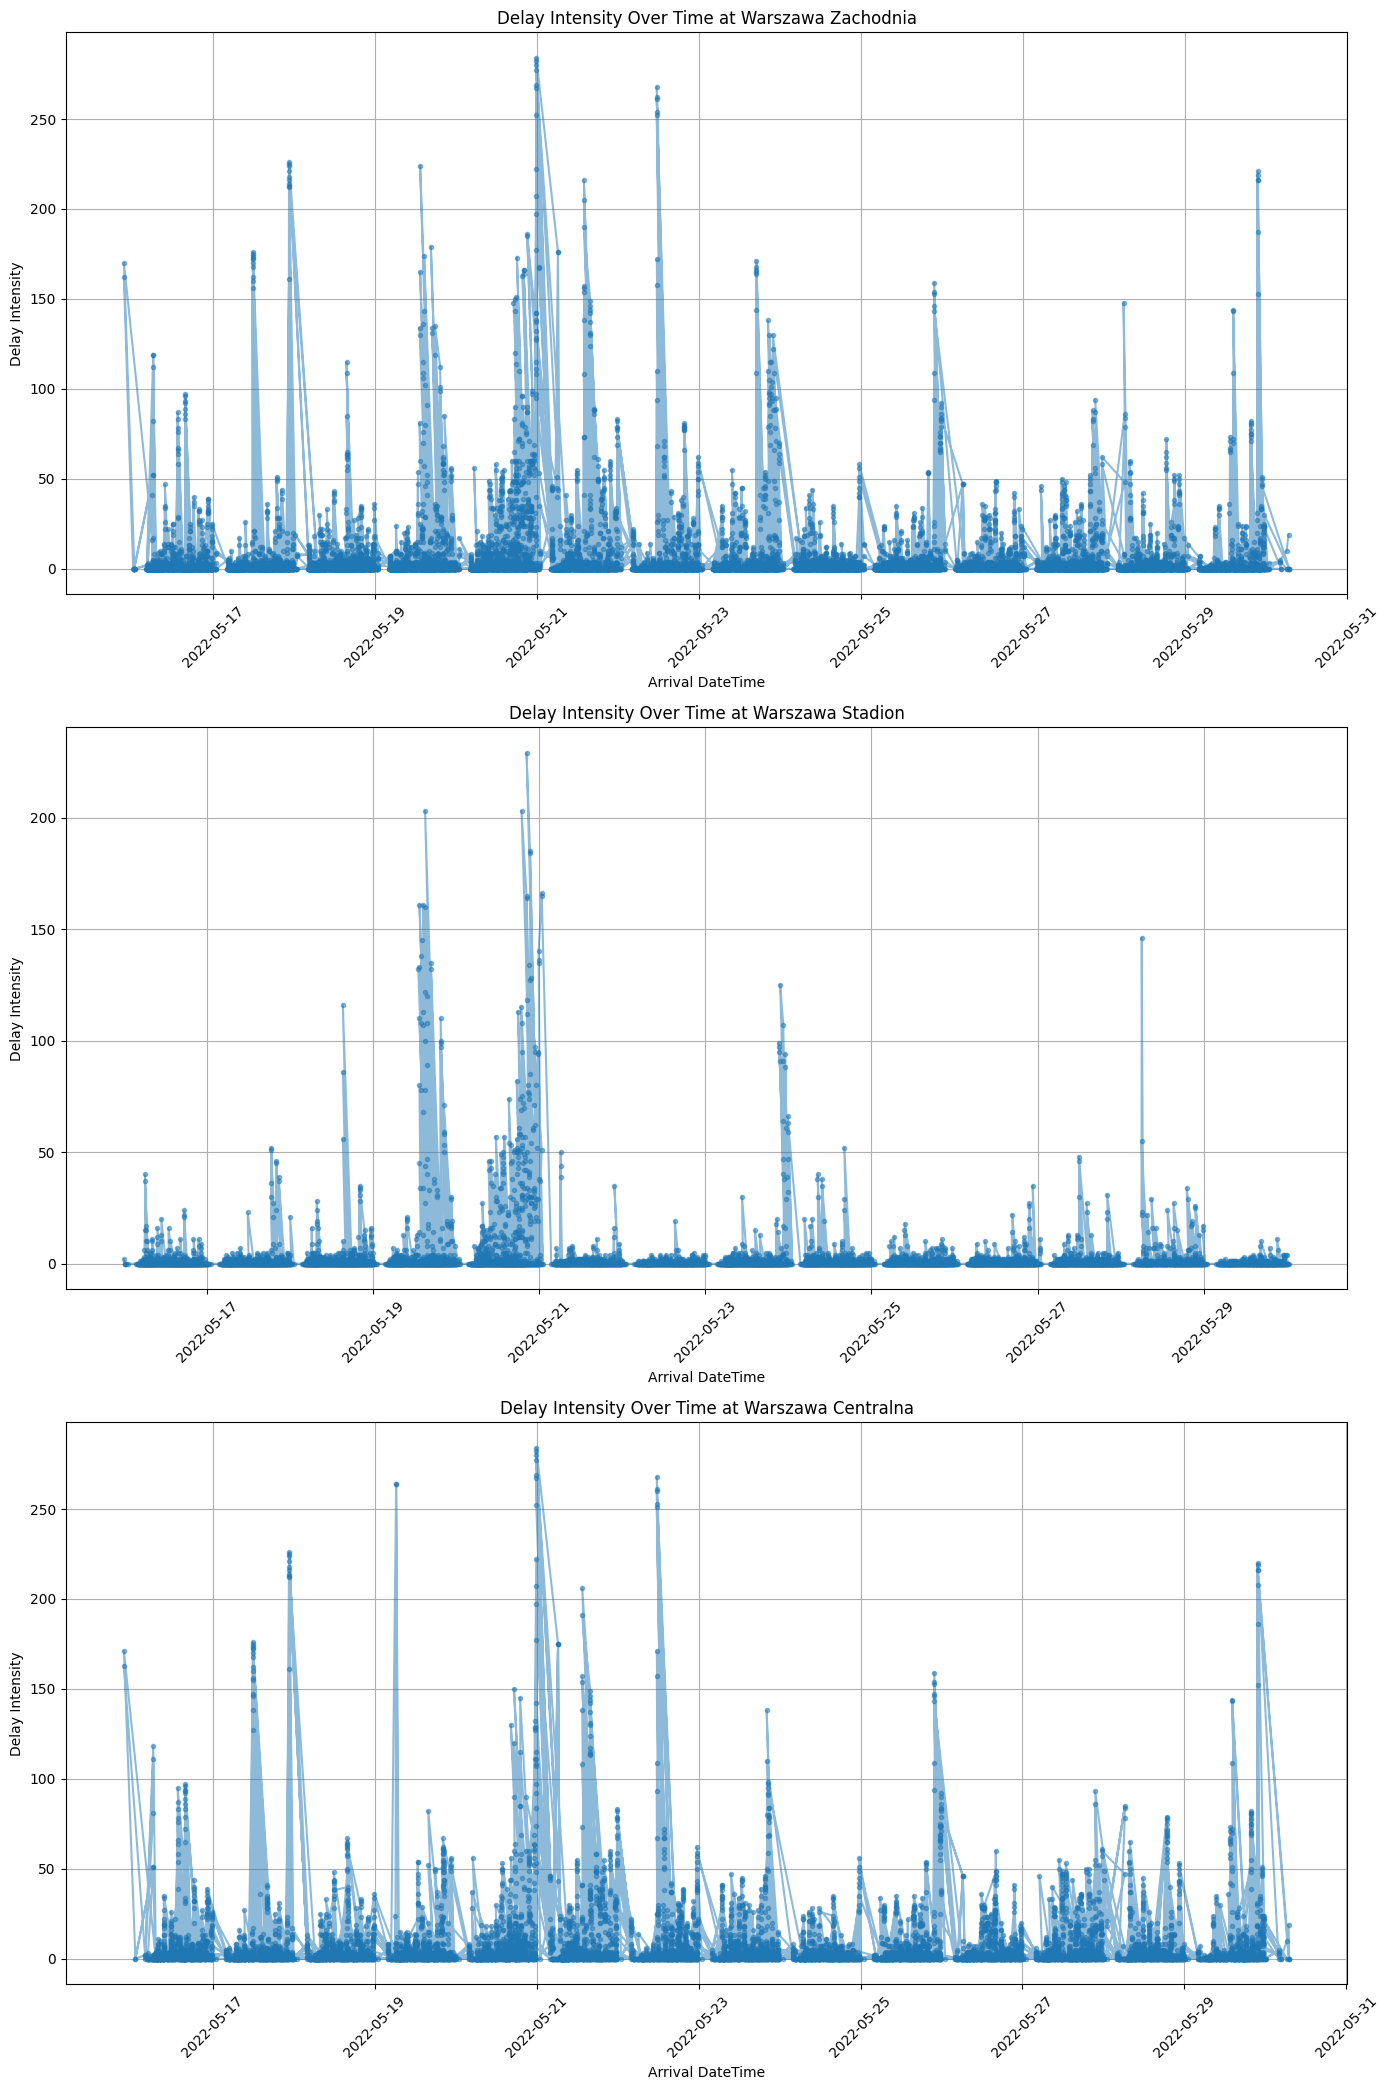

In [30]:
stations_of_interest = ['Warszawa Zachodnia', 'Warszawa Stadion', 'Warszawa Centralna']

# erstelle subplots for jede station
fig, axs = plt.subplots(len(stations_of_interest), figsize=(14, 7 * len(stations_of_interest)))

for ax, station in zip(axs, stations_of_interest):
    station_data = data1[data1['name'] == station]
    ax.plot(station_data['arrival_datetime'], station_data['delay_int'], 
            marker='o', markersize=3, linestyle='-', alpha=0.5)
    ax.set_title(f'Delay Intensity Over Time at {station}')
    ax.set_xlabel('Arrival DateTime')
    ax.set_ylabel('Delay Intensity')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


array([[<AxesSubplot: title={'center': 'date'}>,
        <AxesSubplot: title={'center': 'arrival_datetime'}>],
       [<AxesSubplot: title={'center': 'delay_int'}>,
        <AxesSubplot: title={'center': 'temperatur'}>]], dtype=object)

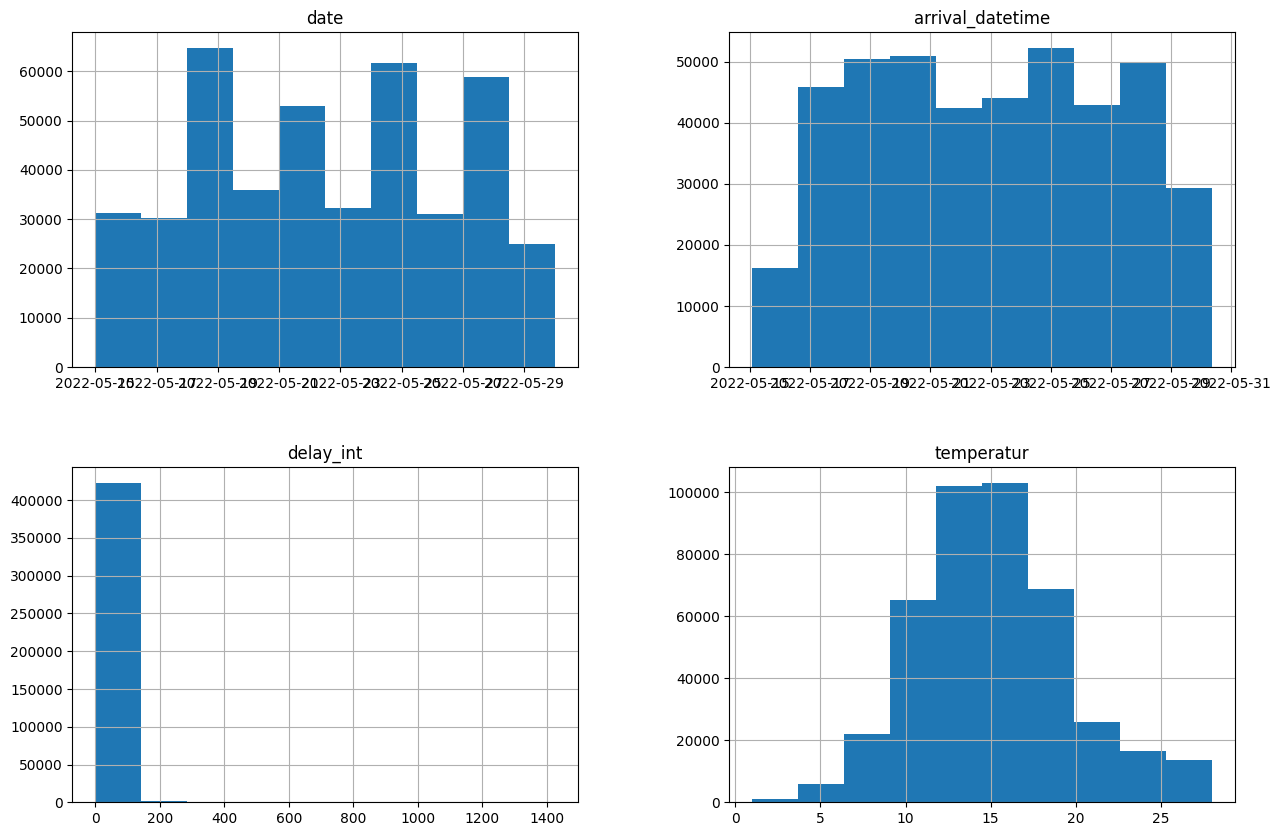

In [31]:
data1.hist(figsize=(15,10))

In [32]:
data1 = data1.join(pd.get_dummies(data1.carrier)).drop(["carrier"], axis=1)

data1

,id,date,connection,arrival,name,arrival_datetime,delay_int,temperatur,Arriva,Koleje Dolnośląskie,Koleje Mazowieckie,Koleje Wielkopolskie,Koleje Śląskie,PKP Intercity,PKP SKM w Trójmieście Sp. z o.o.,POLREGIO Sp. z o.o.,SKM Warszawa,Łódzka Kolej Aglomeracyjna
0,41002/3 (102) POLONIA,2022-05-15,Bohumin - Warszawa Wschodnia,21:31:00,Warszawa Zachodnia,2022-05-15 21:31:00,162,14.2,0,0,0,0,0,1,0,0,0,0
1,91888/9 (102),2022-05-16,Siedlce - Warszawa Zachodnia,00:15:00,Warszawa Zachodnia,2022-05-16 00:15:00,0,11.0,0,0,1,0,0,0,0,0,0,0
2,21644/5 (102),2022-05-16,Radom Główny - Warszawa Wschodnia,00:29:00,Warszawa Zachodnia,2022-05-16 00:29:00,0,11.0,0,0,1,0,0,0,0,0,0,0
3,19300/1 (102),2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34:00,Warszawa Zachodnia,2022-05-16 00:34:00,0,11.0,0,0,1,0,0,0,0,0,0,0
4,38170/1 (102) USTRONIE,2022-05-16,Kraków Główny - Kołobrzeg,00:55:00,Warszawa Zachodnia,2022-05-16 00:55:00,0,11.0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423937,40638 S1,2022-05-29,Gliwice - Częstochowa,23:51:00,Zawiercie,2022-05-29 23:51:00,7,10.7,0,0,0,0,1,0,0,0,0,0
423938,61170/1 KARKONOSZE,2022-05-30,Jelenia Góra - Warszawa Wschodnia,04:36:00,Zawiercie,2022-05-30 04:36:00,4,9.0,0,0,0,0,0,1,0,0,0,0
423939,18170/1 UZNAM,2022-05-30,Warszawa Wschodnia - Świnoujście,00:47:00,Konin,2022-05-30 00:47:00,3,11.1,0,0,0,0,0,1,0,0,0,0
423940,81170/1 UZNAM,2022-05-30,Świnoujście - Warszawa Wschodnia,04:10:00,Konin,2022-05-30 04:10:00,24,9.1,0,0,0,0,0,1,0,0,0,0


In [33]:
data1['id'] = pd.Categorical(data1['id']).codes
data1['connection'] = pd.Categorical(data1['connection']).codes
data1['name'] = pd.Categorical(data1['name']).codes


In [34]:
#in numerischen Werte umwandeln
data1['id'] = (data1['id'] - data1['id'].min()) / (data1['id'].max() - data1['id'].min())
data1['connection'] = (data1['connection'] - data1['connection'].min()) / (data1['connection'].max() - data1['connection'].min())

In [35]:
#neue numerische Spalten
data1['hour_of_day'] = data1['arrival_datetime'].dt.hour
data1['day_of_week'] = data1['arrival_datetime'].dt.dayofweek
data1['minutes'] = data1['arrival_datetime'].dt.minute

C:\Users\Asus\AppData\Local\Temp\ipykernel_23888\2756078439.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

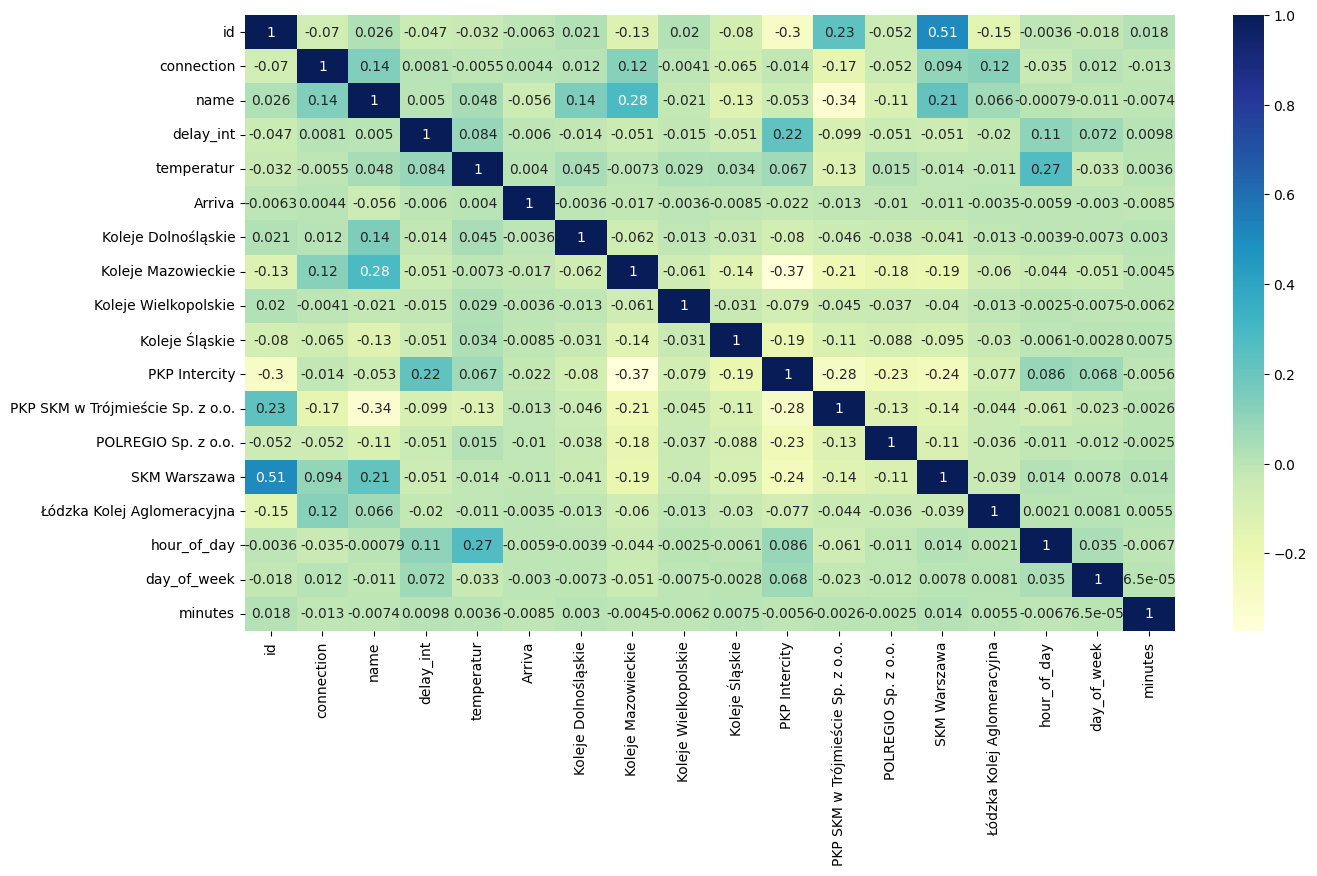

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot=True, cmap="YlGnBu")

In [37]:
data1

,id,date,connection,arrival,name,arrival_datetime,delay_int,temperatur,Arriva,Koleje Dolnośląskie,...,Koleje Wielkopolskie,Koleje Śląskie,PKP Intercity,PKP SKM w Trójmieście Sp. z o.o.,POLREGIO Sp. z o.o.,SKM Warszawa,Łódzka Kolej Aglomeracyjna,hour_of_day,day_of_week,minutes
0,0.344702,2022-05-15,0.023139,21:31:00,81,2022-05-15 21:31:00,162,14.2,0,0,...,0,0,1,0,0,0,0,21,6,31
1,0.792223,2022-05-16,0.586519,00:15:00,81,2022-05-16 00:15:00,0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,0.166247,2022-05-16,0.544266,00:29:00,81,2022-05-16 00:29:00,0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,29
3,0.106720,2022-05-16,0.771630,00:34:00,81,2022-05-16 00:34:00,0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,34
4,0.272212,2022-05-16,0.291751,00:55:00,81,2022-05-16 00:55:00,0,11.0,0,0,...,0,0,1,0,0,0,0,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423937,0.318903,2022-05-29,0.163984,23:51:00,89,2022-05-29 23:51:00,7,10.7,0,0,...,0,1,0,0,0,0,0,23,6,51
423938,0.525422,2022-05-30,0.215292,04:36:00,89,2022-05-30 04:36:00,4,9.0,0,0,...,0,0,1,0,0,0,0,4,0,36
423939,0.096275,2022-05-30,0.806841,00:47:00,30,2022-05-30 00:47:00,3,11.1,0,0,...,0,0,1,0,0,0,0,0,0,47
423940,0.690410,2022-05-30,0.988934,04:10:00,30,2022-05-30 04:10:00,24,9.1,0,0,...,0,0,1,0,0,0,0,4,0,10


In [38]:
unique_id_count = len(data1['id'].unique())
unique_id_count

7947

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423942 entries, 0 to 423941
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id                                423942 non-null  float64       
 1   date                              423942 non-null  datetime64[ns]
 2   connection                        423942 non-null  float64       
 3   arrival                           423942 non-null  object        
 4   name                              423942 non-null  int8          
 5   arrival_datetime                  423942 non-null  datetime64[ns]
 6   delay_int                         423942 non-null  int64         
 7   temperatur                        423942 non-null  float64       
 8   Arriva                            423942 non-null  uint8         
 9   Koleje Dolnośląskie               423942 non-null  uint8         
 10  Koleje Mazowieckie              

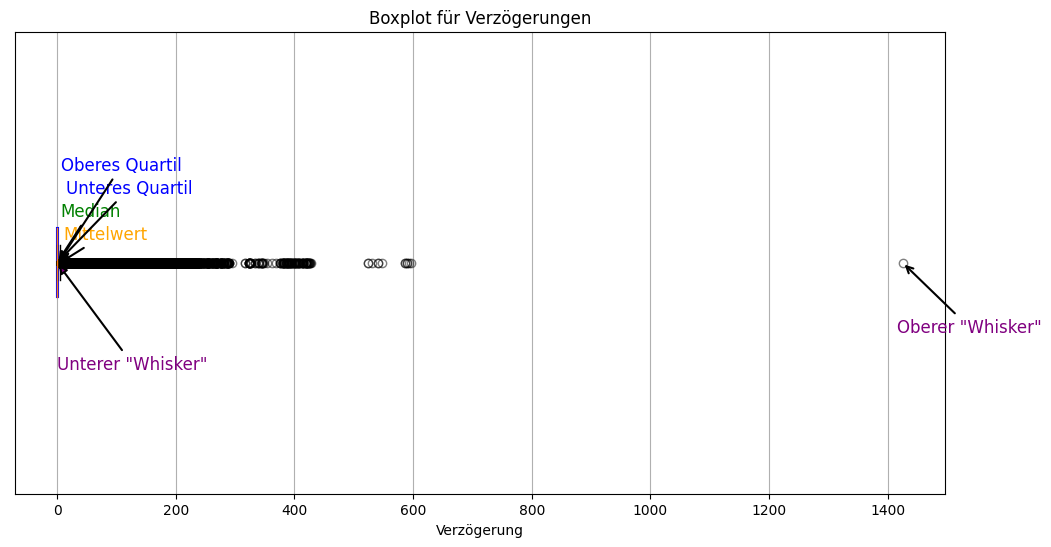

Oberes Quartil (Q3) Wert: 2.0
Unteres Quartil (Q1) Wert: 0.0
Median: 0.0
Mittelwert: 4.851109349863896
min Value: 0
max Value: 1425


In [41]:
# Boxplot erstellen
fig, ax = plt.subplots(figsize=(12, 6))
boxprops = dict(linestyle='-', linewidth=1.5, color='blue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='purple')
flierprops = dict(marker='o', color='red', alpha=0.5)

# Boxplot mit spezifischen Eigenschaften
bp = ax.boxplot(data1['delay_int'], vert=False, patch_artist=True, showfliers=True,
                whiskerprops=whiskerprops, boxprops=boxprops, flierprops=flierprops)

# Farbe für das Box-Interieur
for box in bp['boxes']:
    box.set(facecolor='lightblue')

# Median, Mean, Quartile und Whisker beschriften
median_val = data1['delay_int'].median()
q1_val = data1['delay_int'].quantile(0.25)
q3_val = data1['delay_int'].quantile(0.75)
min_val = min(data1['delay_int'])
max_val = max(data1['delay_int'])
mean_val = data1['delay_int'].mean()

ax.annotate('Mittelwert', xy=(mean_val, 1), xytext=(mean_val + 5, 1.05),
            arrowprops=dict(facecolor='orange', arrowstyle='->', linewidth=1.5), fontsize=12, color='orange')
ax.annotate('Median', xy=(median_val, 1), xytext=(median_val + 5, 1.1),
            arrowprops=dict(facecolor='green', arrowstyle='->', linewidth=1.5), fontsize=12, color='green')
ax.annotate('Unteres Quartil', xy=(q1_val, 1), xytext=(q1_val + 15, 1.15),
            arrowprops=dict(facecolor='blue', arrowstyle='->', linewidth=1.5), fontsize=12, color='blue')
ax.annotate('Oberes Quartil', xy=(q3_val, 1), xytext=(q3_val + 5, 1.2),
            arrowprops=dict(facecolor='blue', arrowstyle='->', linewidth=1.5), fontsize=12, color='blue')
ax.annotate('Unterer "Whisker"', xy=(min_val, 1), xytext=(min_val, 0.8),
            arrowprops=dict(facecolor='purple', arrowstyle='-|>', linewidth=1.5), fontsize=12, color='purple', va='top')
ax.annotate('Oberer "Whisker"', xy=(max_val, 1), xytext=(max_val - 10, 0.85),
            arrowprops=dict(facecolor='purple', arrowstyle='->', linewidth=1.5), fontsize=12, color='purple')

# Skalierung und Beschriftungen
plt.yticks([])
plt.xlabel('Verzögerung')
plt.title('Boxplot für Verzögerungen')
plt.grid(True)

# Anzeigen des Plots
plt.show()
print(f"Oberes Quartil (Q3) Wert: {q3_val}")
print(f"Unteres Quartil (Q1) Wert: {q1_val}")
print(f"Median: {median_val}")
print(f"Mittelwert: {mean_val}")
print(f"min Value: {min_val}")
print(f"max Value: {max_val}")

In [42]:
percentile_99 = data1['delay_int'].quantile(0.99)
#outliers filtern 99%
data1 = data1[data1['delay_int'] <= percentile_99] 
percentile_99

83.0

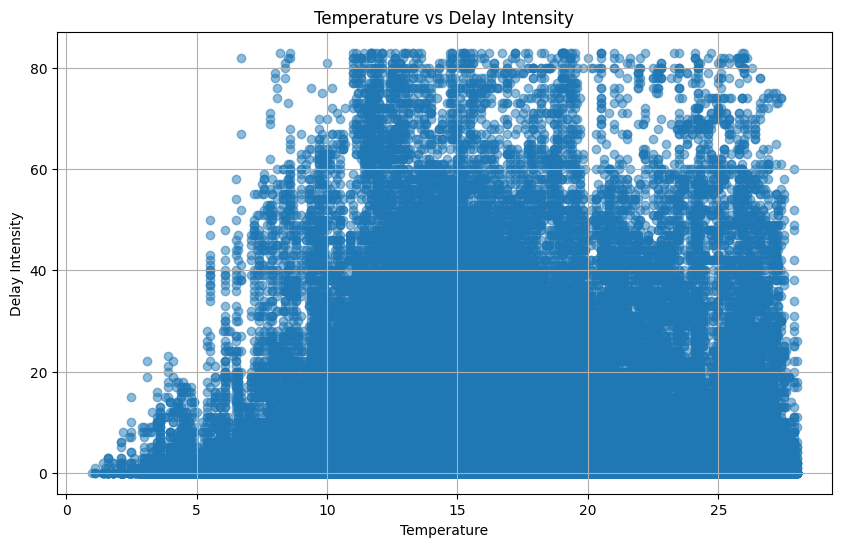

In [43]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data1['temperatur'], data1['delay_int'], alpha=0.5)
plt.title('Temperature vs Delay Intensity')
plt.xlabel('Temperature')
plt.ylabel('Delay Intensity')
plt.grid(True)
plt.show()


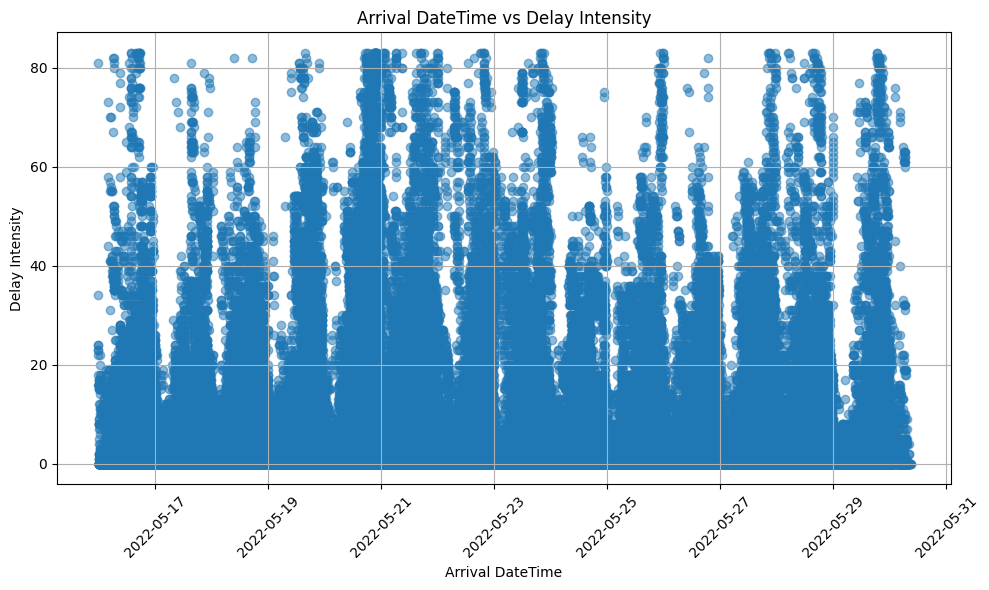

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(data1['arrival_datetime'], data1['delay_int'], alpha=0.5)
plt.title('Arrival DateTime vs Delay Intensity')
plt.xlabel('Arrival DateTime')
plt.ylabel('Delay Intensity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

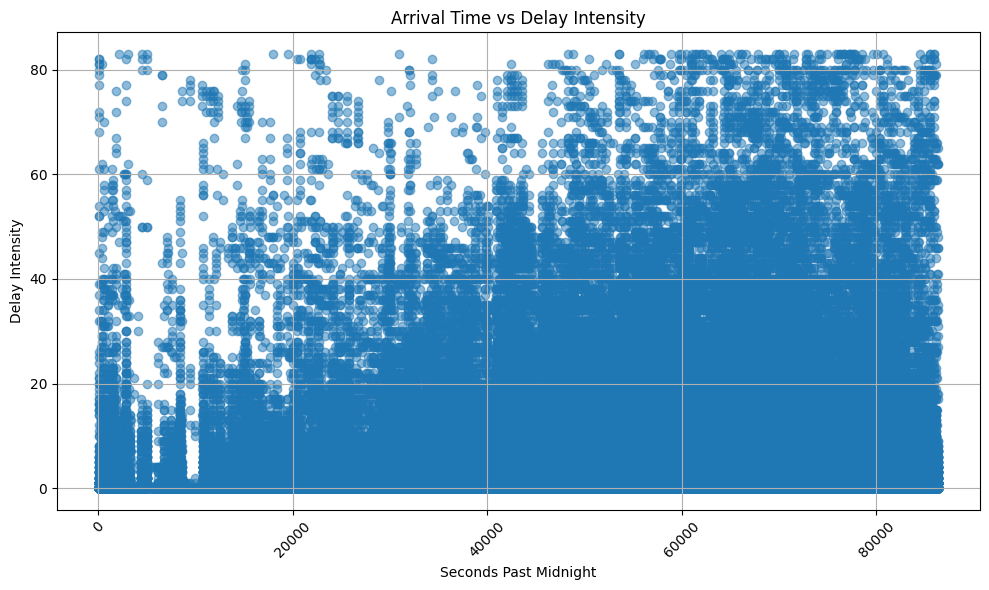

In [45]:
#'arrival'-->numerisch
if pd.api.types.is_datetime64_any_dtype(data1['arrival']):
    x_data = data1['arrival']
else:
    x_data = data1['arrival'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

plt.figure(figsize=(10, 6))
plt.scatter(x_data, data1['delay_int'], alpha=0.5)
plt.title('Arrival Time vs Delay Intensity')
plt.xlabel('Arrival Time' if pd.api.types.is_datetime64_any_dtype(x_data) else 'Seconds Past Midnight')
plt.ylabel('Delay Intensity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
data1

,id,date,connection,arrival,name,arrival_datetime,delay_int,temperatur,Arriva,Koleje Dolnośląskie,...,Koleje Wielkopolskie,Koleje Śląskie,PKP Intercity,PKP SKM w Trójmieście Sp. z o.o.,POLREGIO Sp. z o.o.,SKM Warszawa,Łódzka Kolej Aglomeracyjna,hour_of_day,day_of_week,minutes
1,0.792223,2022-05-16,0.586519,00:15:00,81,2022-05-16 00:15:00,0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,0.166247,2022-05-16,0.544266,00:29:00,81,2022-05-16 00:29:00,0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,29
3,0.106720,2022-05-16,0.771630,00:34:00,81,2022-05-16 00:34:00,0,11.0,0,0,...,0,0,0,0,0,0,0,0,0,34
4,0.272212,2022-05-16,0.291751,00:55:00,81,2022-05-16 00:55:00,0,11.0,0,0,...,0,0,1,0,0,0,0,0,0,55
5,0.703750,2022-05-16,0.278672,04:19:00,81,2022-05-16 04:19:00,2,8.2,0,0,...,0,0,1,0,0,0,0,4,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423937,0.318903,2022-05-29,0.163984,23:51:00,89,2022-05-29 23:51:00,7,10.7,0,0,...,0,1,0,0,0,0,0,23,6,51
423938,0.525422,2022-05-30,0.215292,04:36:00,89,2022-05-30 04:36:00,4,9.0,0,0,...,0,0,1,0,0,0,0,4,0,36
423939,0.096275,2022-05-30,0.806841,00:47:00,30,2022-05-30 00:47:00,3,11.1,0,0,...,0,0,1,0,0,0,0,0,0,47
423940,0.690410,2022-05-30,0.988934,04:10:00,30,2022-05-30 04:10:00,24,9.1,0,0,...,0,0,1,0,0,0,0,4,0,10


In [47]:
data1 = data1.drop('arrival', axis=1)
data1 = data1.drop('date', axis=1)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data1.drop("delay_int", axis = 1)
y = data1["delay_int"]

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [49]:
train_data1=X_train.join(y_train)
train_data1

,id,connection,name,arrival_datetime,temperatur,Arriva,Koleje Dolnośląskie,Koleje Mazowieckie,Koleje Wielkopolskie,Koleje Śląskie,PKP Intercity,PKP SKM w Trójmieście Sp. z o.o.,POLREGIO Sp. z o.o.,SKM Warszawa,Łódzka Kolej Aglomeracyjna,hour_of_day,day_of_week,minutes,delay_int
402691,0.793355,0.193159,81,2022-05-29 07:27:00,10.0,0,0,1,0,0,0,0,0,0,0,7,6,27,0
125486,0.998490,0.635815,74,2022-05-19 22:27:00,15.6,0,0,0,0,0,0,0,0,1,0,22,3,27,0
378373,0.986157,0.635815,75,2022-05-28 08:19:00,9.6,0,0,0,0,0,0,0,0,1,0,8,5,19,0
327921,0.833753,0.179074,82,2022-05-26 15:41:00,17.5,0,0,1,0,0,0,0,0,0,0,15,3,41,0
9785,0.893657,0.114688,83,2022-05-16 10:47:00,16.8,0,0,0,0,0,0,1,0,0,0,10,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182558,0.186006,0.363179,91,2022-05-21 18:33:00,16.1,0,0,0,0,0,1,0,0,0,0,18,5,33,3
268684,0.897810,0.154930,85,2022-05-24 17:00:00,17.0,0,0,0,0,0,0,1,0,0,0,17,1,0,0
105666,0.190788,0.355131,52,2022-05-19 13:09:00,22.7,0,0,0,0,0,1,0,0,0,0,13,3,9,5
307018,0.150768,0.364185,92,2022-05-25 21:21:00,11.7,0,0,0,0,0,1,0,0,0,0,21,2,21,28


In [50]:
print(X_train.dtypes)


id                                         float64
connection                                 float64
name                                          int8
arrival_datetime                    datetime64[ns]
temperatur                                 float64
Arriva                                       uint8
Koleje Dolnośląskie                          uint8
Koleje Mazowieckie                           uint8
Koleje Wielkopolskie                         uint8
Koleje Śląskie                               uint8
PKP Intercity                                uint8
PKP SKM w Trójmieście Sp. z o.o.             uint8
POLREGIO Sp. z o.o.                          uint8
SKM Warszawa                                 uint8
Łódzka Kolej Aglomeracyjna                   uint8
hour_of_day                                  int64
day_of_week                                  int64
minutes                                      int64
dtype: object


In [51]:
X_train = X_train.drop(columns=['arrival_datetime'])

In [52]:

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)


LinearRegression()

In [53]:
X_test = X_test.drop(columns=['arrival_datetime'])

test_data1=X_test.join(y_test)
test_data1

,id,connection,name,temperatur,Arriva,Koleje Dolnośląskie,Koleje Mazowieckie,Koleje Wielkopolskie,Koleje Śląskie,PKP Intercity,PKP SKM w Trójmieście Sp. z o.o.,POLREGIO Sp. z o.o.,SKM Warszawa,Łódzka Kolej Aglomeracyjna,hour_of_day,day_of_week,minutes,delay_int
263666,0.251573,0.288732,2,19.0,0,0,0,0,0,1,0,0,0,0,15,1,27,2
399771,0.143594,0.790744,82,8.5,0,0,1,0,0,0,0,0,0,0,4,6,7,0
219550,0.840045,0.390342,79,9.4,0,0,1,0,0,0,0,0,0,0,6,0,32,0
346720,0.093506,0.958753,43,13.3,0,0,0,0,0,1,0,0,0,0,8,4,29,0
83148,0.935439,0.451710,22,18.0,0,0,0,0,0,0,0,0,1,0,16,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217688,0.755852,0.938632,63,9.6,0,0,1,0,0,0,0,0,0,0,6,0,8,0
7558,0.928140,0.451710,66,11.1,0,0,0,0,0,0,0,0,1,0,8,0,0,1
50881,0.977473,0.750503,73,17.2,0,0,0,0,0,0,0,0,1,0,16,1,36,0
130596,0.155550,0.696177,29,14.1,0,0,0,0,0,0,0,0,0,1,6,4,44,0


In [54]:
X_test_s = scaler.transform(X_test)
reg.score(X_test_s, y_test)

0.11099185049274285

In [55]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error

forest= RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
forest.score(X_test,y_test)

0.540622990013401

In [57]:
import time
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid={
    "n_estimators":[500, 1000],
    "max_features":[15],
    "min_samples_split":[30]
    #"max_depth":[None,4,8]--> None war beste Lösung
}

# Startzeit messen
start_time = time.time()

#neg_mse--> positive score
grid_search = GridSearchCV(forest,param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score= True)
grid_search.fit(X_train_s, y_train)

# Endzeit messen
end_time = time.time()

# Laufzeit berechnen
training_duration = end_time - start_time

print(f"Die Trainingszeit für das Random Forest Modell beträgt {training_duration:.2f} Sekunden.")

Die Trainingszeit für das Random Forest Modell beträgt 7023.22 Sekunden.


7023.22 ca. 2h 

In [58]:
grid_search.best_estimator_

RandomForestRegressor(max_features=15, min_samples_split=30, n_estimators=1000)

In [59]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.5669020112551745

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = grid_search.best_estimator_.predict(X_test_s)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 2.7365503275096867
Mean Squared Error (MSE): 36.41135594820482
Root Mean Squared Error (RMSE): 6.034182293252734


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


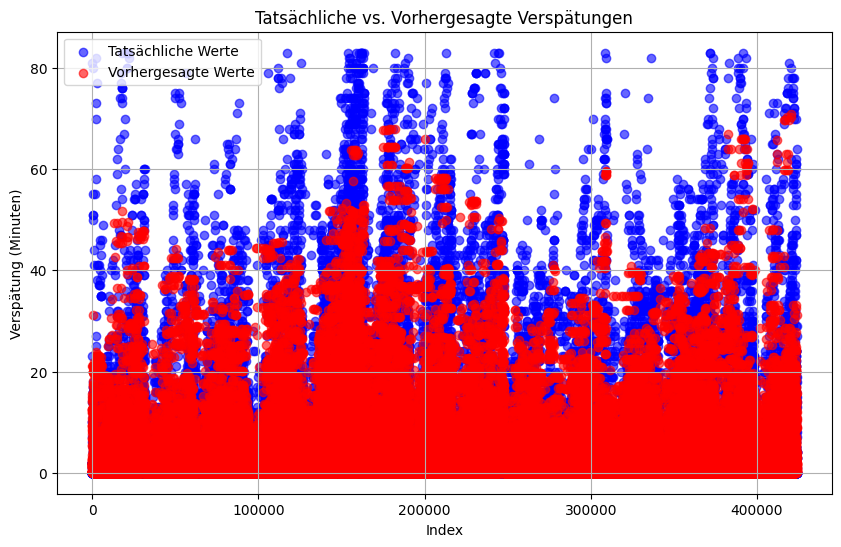

In [61]:
y_pred = grid_search.best_estimator_.predict(X_test_s)

# Berechnung der Residuen
residuals = y_test - y_pred

# Tatsächliche Werte vs. Vorhergesagte Werte in verschiedenen Farben
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, alpha=0.6, label='Tatsächliche Werte', color='blue')
plt.scatter(y_test.index, y_pred, alpha=0.6, label='Vorhergesagte Werte', color='red')
plt.xlabel('Index')
plt.ylabel('Verspätung (Minuten)')
plt.title('Tatsächliche vs. Vorhergesagte Verspätungen')
plt.legend()
plt.grid(True)
plt.show()


In [63]:

# Initialisiere das RandomForest-Modell
forest = RandomForestRegressor()

# Trainiere das Modell mit den skalierten Trainingsdaten
forest.fit(X_train_s, y_train)

# Konvertiere X_test_s in einen DataFrame mit den ursprünglichen Spaltennamen
X_test_s_df = pd.DataFrame(X_test_s, columns=X_train.columns)

# Vorhersagen machen
y_pred = forest.predict(X_test_s_df)
print(y_pred)



C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


[0.9615     0.         0.216      ... 0.22233333 0.84783333 0.2955    ]


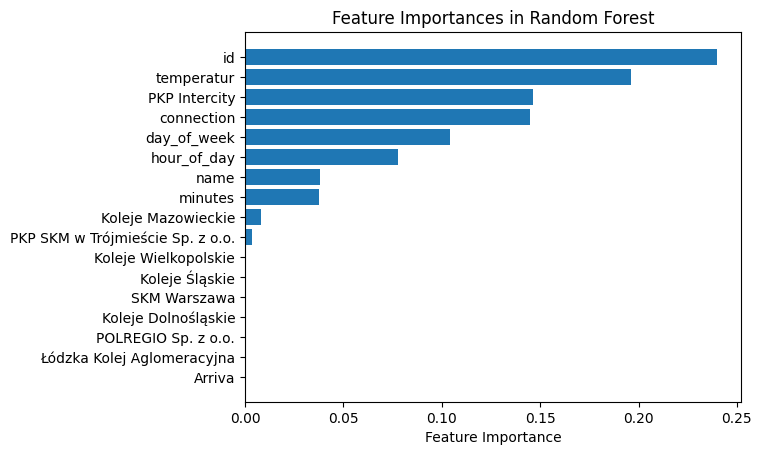

In [64]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest')
plt.show()


In [65]:
import time
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid={
    "n_estimators":[1000],
    "max_features":[15],
    "min_samples_split":[30]
    #"max_depth":[None,4,8]--> None war beste Lösung
}

# Startzeit messen
start_time = time.time()

#neg_mse--> positive score
grid_search = GridSearchCV(forest,param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score= True)
grid_search.fit(X_train_s, y_train)

# Endzeit messen
end_time = time.time()

# Laufzeit berechnen
training_duration = end_time - start_time

print(f"Die Trainingszeit für das Random Forest Modell beträgt {training_duration:.2f} Sekunden.")

Die Trainingszeit für das Random Forest Modell beträgt 6437.20 Sekunden.


1.8 Stunden

In [67]:
import time
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid={
    "n_estimators":[200],
    "max_features":[15],
    "min_samples_split":[30]
    #"max_depth":[None,4,8]--> None war beste Lösung
}

# Startzeit messen
start_time = time.time()

#neg_mse--> positive score
grid_search = GridSearchCV(forest,param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score= True)
grid_search.fit(X_train_s, y_train)

# Endzeit messen
end_time = time.time()

# Laufzeit berechnen
training_duration = end_time - start_time

print(f"Die Trainingszeit für das Random Forest Modell beträgt {training_duration:.2f} Sekunden.")

Die Trainingszeit für das Random Forest Modell beträgt 1002.55 Sekunden.


In [69]:
grid_search.best_estimator_
grid_search.best_estimator_.score(X_test_s, y_test)

0.5651600521653681

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


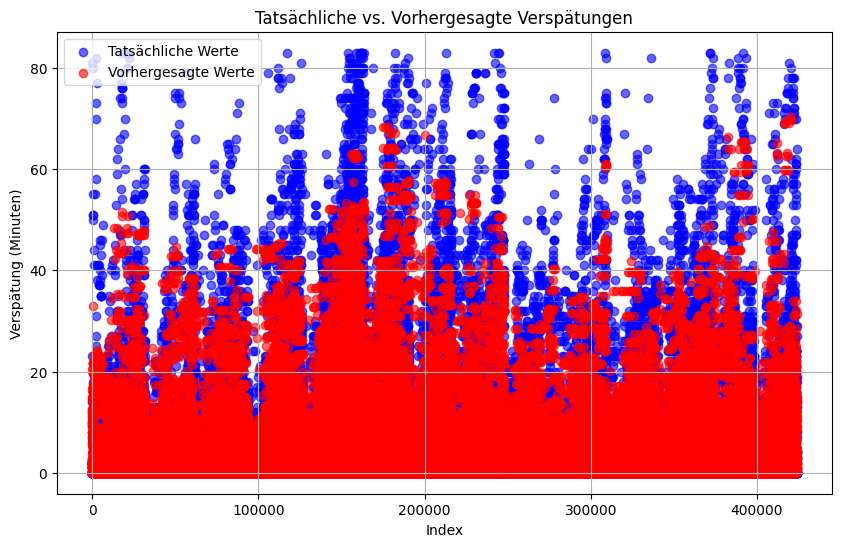

In [68]:
y_pred = grid_search.best_estimator_.predict(X_test_s)

# Berechnung der Residuen
residuals = y_test - y_pred

# Tatsächliche Werte vs. Vorhergesagte Werte in verschiedenen Farben
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, alpha=0.6, label='Tatsächliche Werte', color='blue')
plt.scatter(y_test.index, y_pred, alpha=0.6, label='Vorhergesagte Werte', color='red')
plt.xlabel('Index')
plt.ylabel('Verspätung (Minuten)')
plt.title('Tatsächliche vs. Vorhergesagte Verspätungen')
plt.legend()
plt.grid(True)
plt.show()
